In [1]:
import pandas as pd
import numpy as np

from data import Data

In [2]:
data = Data("project_train.csv")

In [3]:
data.preprocess(shuffle=True, remove_duplicates=True,
                bound_bool=True, unbound_bool=True, 
                class_bool = True, binary_bool = False)

There were 6 duplicated elements in the dataset, and have been removed from the dataframe


In [4]:
test_data = Data("project_test.csv", test=True)

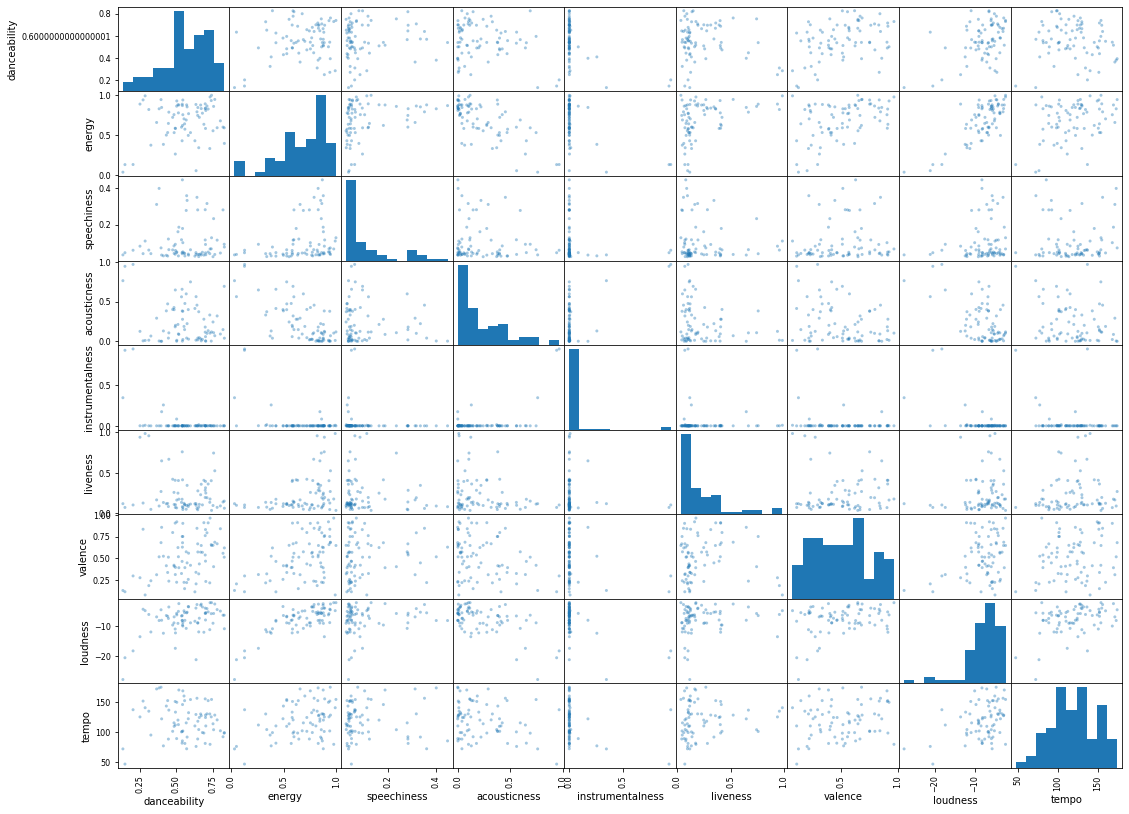

In [5]:
test_data.visualize()

In [6]:
test_data.df = data.preprocess_new_data(test_data)

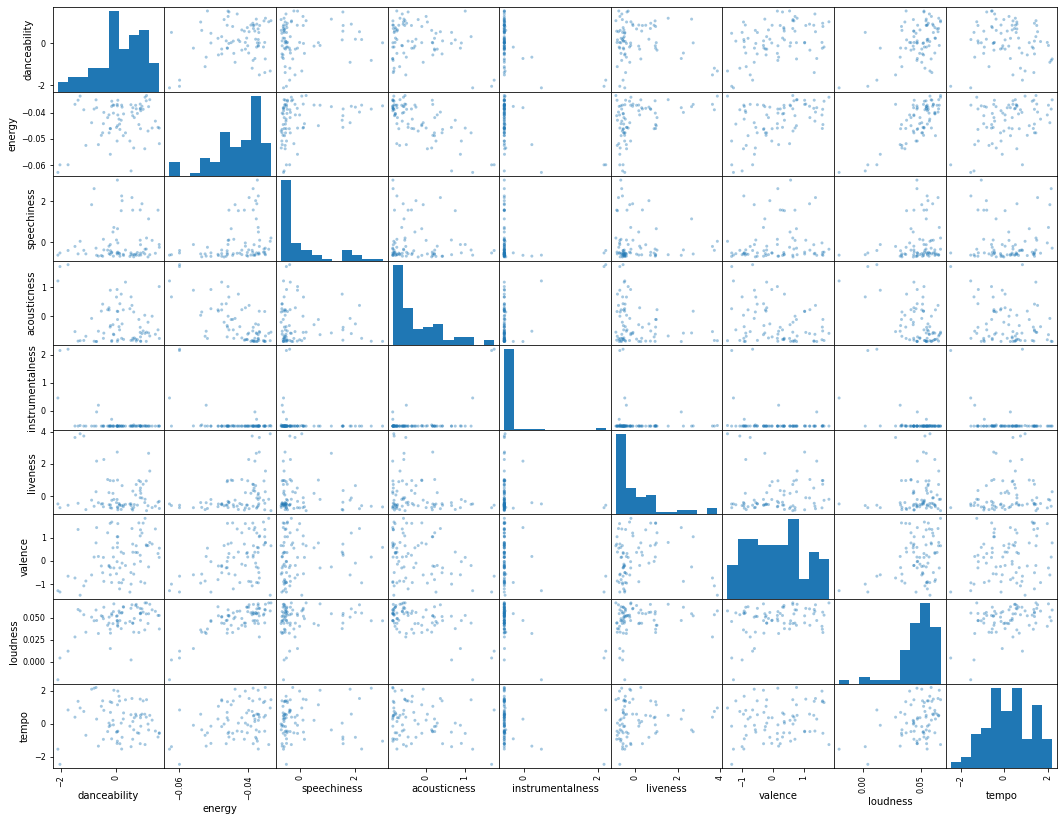

In [7]:
test_data.visualize()

accuracy : 0.8657314629258517
recall : 0.928
precision : 0.8256227758007118
F1 : 0.8738229755178908


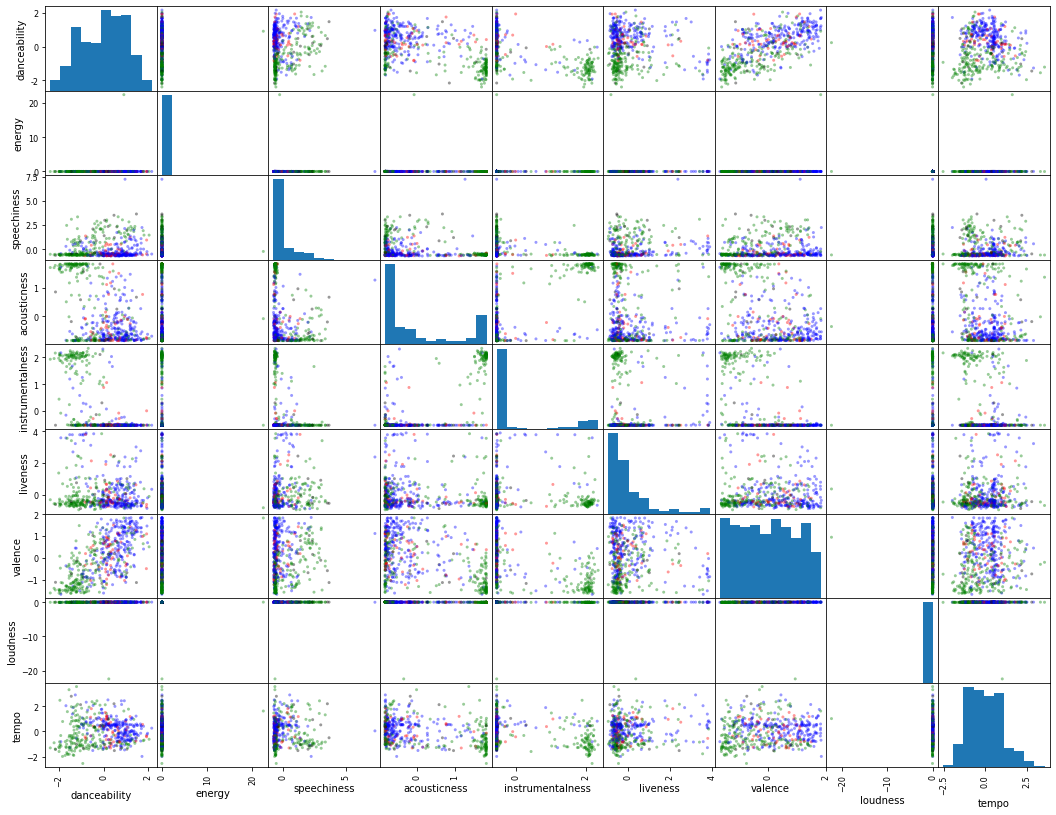

In [8]:
from learning_machine import SVM

n_estimators = 150
svm = SVM(data)
svm._change_parameters("rbf")

svm.fit_with_all_data()

In [9]:
predictions = svm._predict(test_data.df)
print(np.shape(predictions))

(75,)


In [10]:
from learning_machine import SVM

PREDICTIONS = np.zeros((75,))

n_iter = 50

for i in range(n_iter):
    n_estimators = 150
    svm = SVM(data)
    svm._change_parameters("rbf")

    svm.fit_with_all_data(visualize=False, print_metrics=False)
    predictions = svm._predict(test_data.df)
    
    PREDICTIONS += predictions
    
#THIS IS NOT NEEDED, SINCE SVM IS NOT A RANDOM METHOD

In [11]:
print(PREDICTIONS/n_iter)

[0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0.]


In [12]:
PREDICTIONS = PREDICTIONS / n_iter

PREDICTIONS = 1*(PREDICTIONS >= 0.5) + 0*(PREDICTIONS < 0.5)
print(PREDICTIONS)

[0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 0]


In [13]:
predictions_svm = PREDICTIONS

In [14]:
from learning_machine import RandomForest

PREDICTIONS = np.zeros((75,))

n_iter = 50

for i in range(n_iter):
    n_estimators = 150
    randomforest = RandomForest(data)
    randomforest._change_parameters(n_estimators)

    randomforest.fit_with_all_data(visualize=False, print_metrics=False)
    predictions = randomforest._predict(test_data.df)
    
    PREDICTIONS += predictions

In [15]:
print(PREDICTIONS/n_iter)

[0.   0.   0.78 0.   1.   1.   0.06 1.   1.   1.   0.   0.   0.84 0.68
 0.22 1.   1.   0.   0.   0.   0.   0.84 0.08 0.72 1.   1.   0.04 0.98
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.98 0.   1.   1.   0.18
 0.02 0.46 0.   0.92 0.   0.   0.   0.   0.9  0.   0.42 0.   0.   0.
 0.   0.   0.04 0.44 1.   0.   0.   0.   0.   0.   0.   0.02 0.   0.24
 0.98 0.   1.   1.   0.  ]


In [16]:
PREDICTIONS = PREDICTIONS / n_iter

PREDICTIONS = 1*(PREDICTIONS >= 0.5) + 0*(PREDICTIONS < 0.5)
print(PREDICTIONS)

[0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 0]


In [17]:
predictions_rf = PREDICTIONS

In [18]:
print(np.sum(np.abs(predictions_rf - predictions_svm)))

12
